<a href="https://colab.research.google.com/github/lelouch0204/flow-time-series/blob/main/adf_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf 

In [ ]:
data_path = '/content/drive/MyDrive/SOP work/nitrate_nitrite_judson.csv'
df = pd.read_csv(data_path)
df = df[df['units']=='Daily Conc. (mg/L)']
df.head()
df.info()
data = [df["Ts Date"], df['Flow (cfs)'], df['Ts Value']]
headers = ["ts_date", "flow_cfs", 'ts_value']
df_rel = pd.concat(data, axis=1, keys=headers)
df_rel["date"] = pd.to_datetime(df_rel['ts_date'])
df_rel = df_rel.sort_values(by='date')
df_rel.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 2146 to 8765
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Station name        4383 non-null   object 
 1   Station number      4383 non-null   object 
 2   Station type        4383 non-null   object 
 3   Parameter           4383 non-null   object 
 4   Ts Date             4383 non-null   object 
 5   units               4383 non-null   object 
 6   Flow (cfs)          4383 non-null   int64  
 7   Month               4383 non-null   int64  
 8   Qc Desc             4383 non-null   object 
 9   year                4383 non-null   int64  
 10  Site name / number  4383 non-null   object 
 11  Parameter measure   4383 non-null   object 
 12  Var Des             4383 non-null   object 
 13  Var Id              4383 non-null   int64  
 14  Ts Value            4383 non-null   float64
dtypes: float64(1), int64(4), object(10)
memory usage: 54

,ts_date,flow_cfs,ts_value,date
6109,01-01-2008,863,0.473,2008-01-01
6110,01-02-2008,886,0.490,2008-01-02
6111,01-03-2008,887,0.488,2008-01-03
6112,01-04-2008,919,0.509,2008-01-04
6113,01-05-2008,942,0.525,2008-01-05


In [ ]:
def rescale_series(df_series):
    df_std = df_series.std()
    df_mean = df_series.mean()
    df_new = (df_series - df_mean)/(df_std)
    return df_new

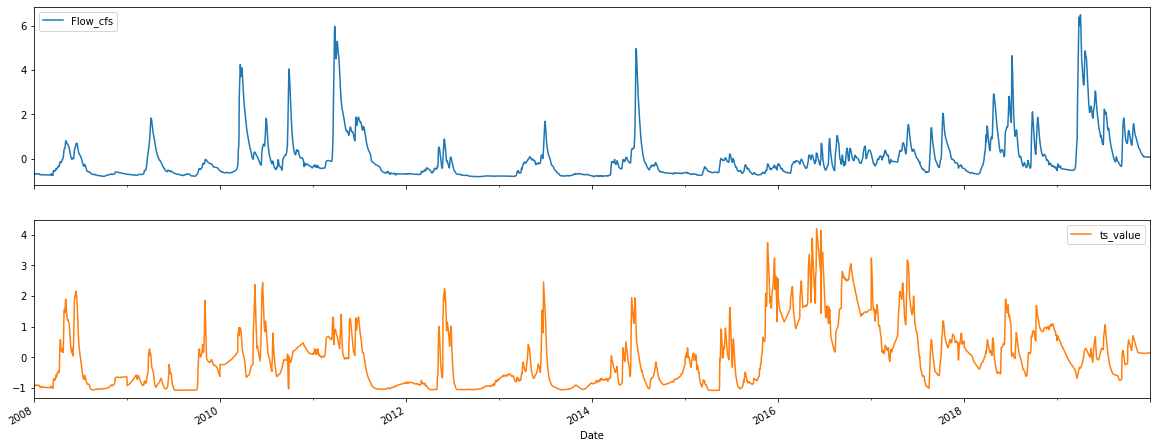

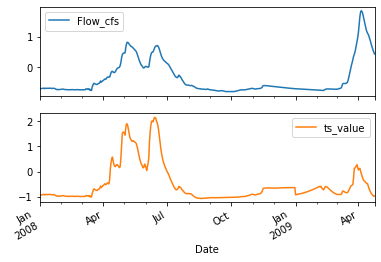

In [ ]:
plot_cols = ['Flow_cfs', 'ts_value']
plot_features = rescale_df[plot_cols]
plot_features.index = rescale_df['Date']
_ = plot_features.plot(subplots=True, figsize=(20, 8))

plot_features = rescale_df[plot_cols][:480]
plot_features.index = rescale_df['Date'][:480]
_ = plot_features.plot(subplots=True)

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
for name, column in df_rel.iteritems():
    if column.name == 'flow_cfs' or column.name == 'ts_value':
        adfuller_test(column, name=column.name)
        print('\n')

    Augmented Dickey-Fuller Test on "flow_cfs" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7957
 No. Lags Chosen       = 4
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ts_value" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.8262
 No. Lags Chosen       = 31
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


